<a href="https://colab.research.google.com/github/punramon/python_dataviz2024/blob/main/final_dataviz_2024_653020213_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป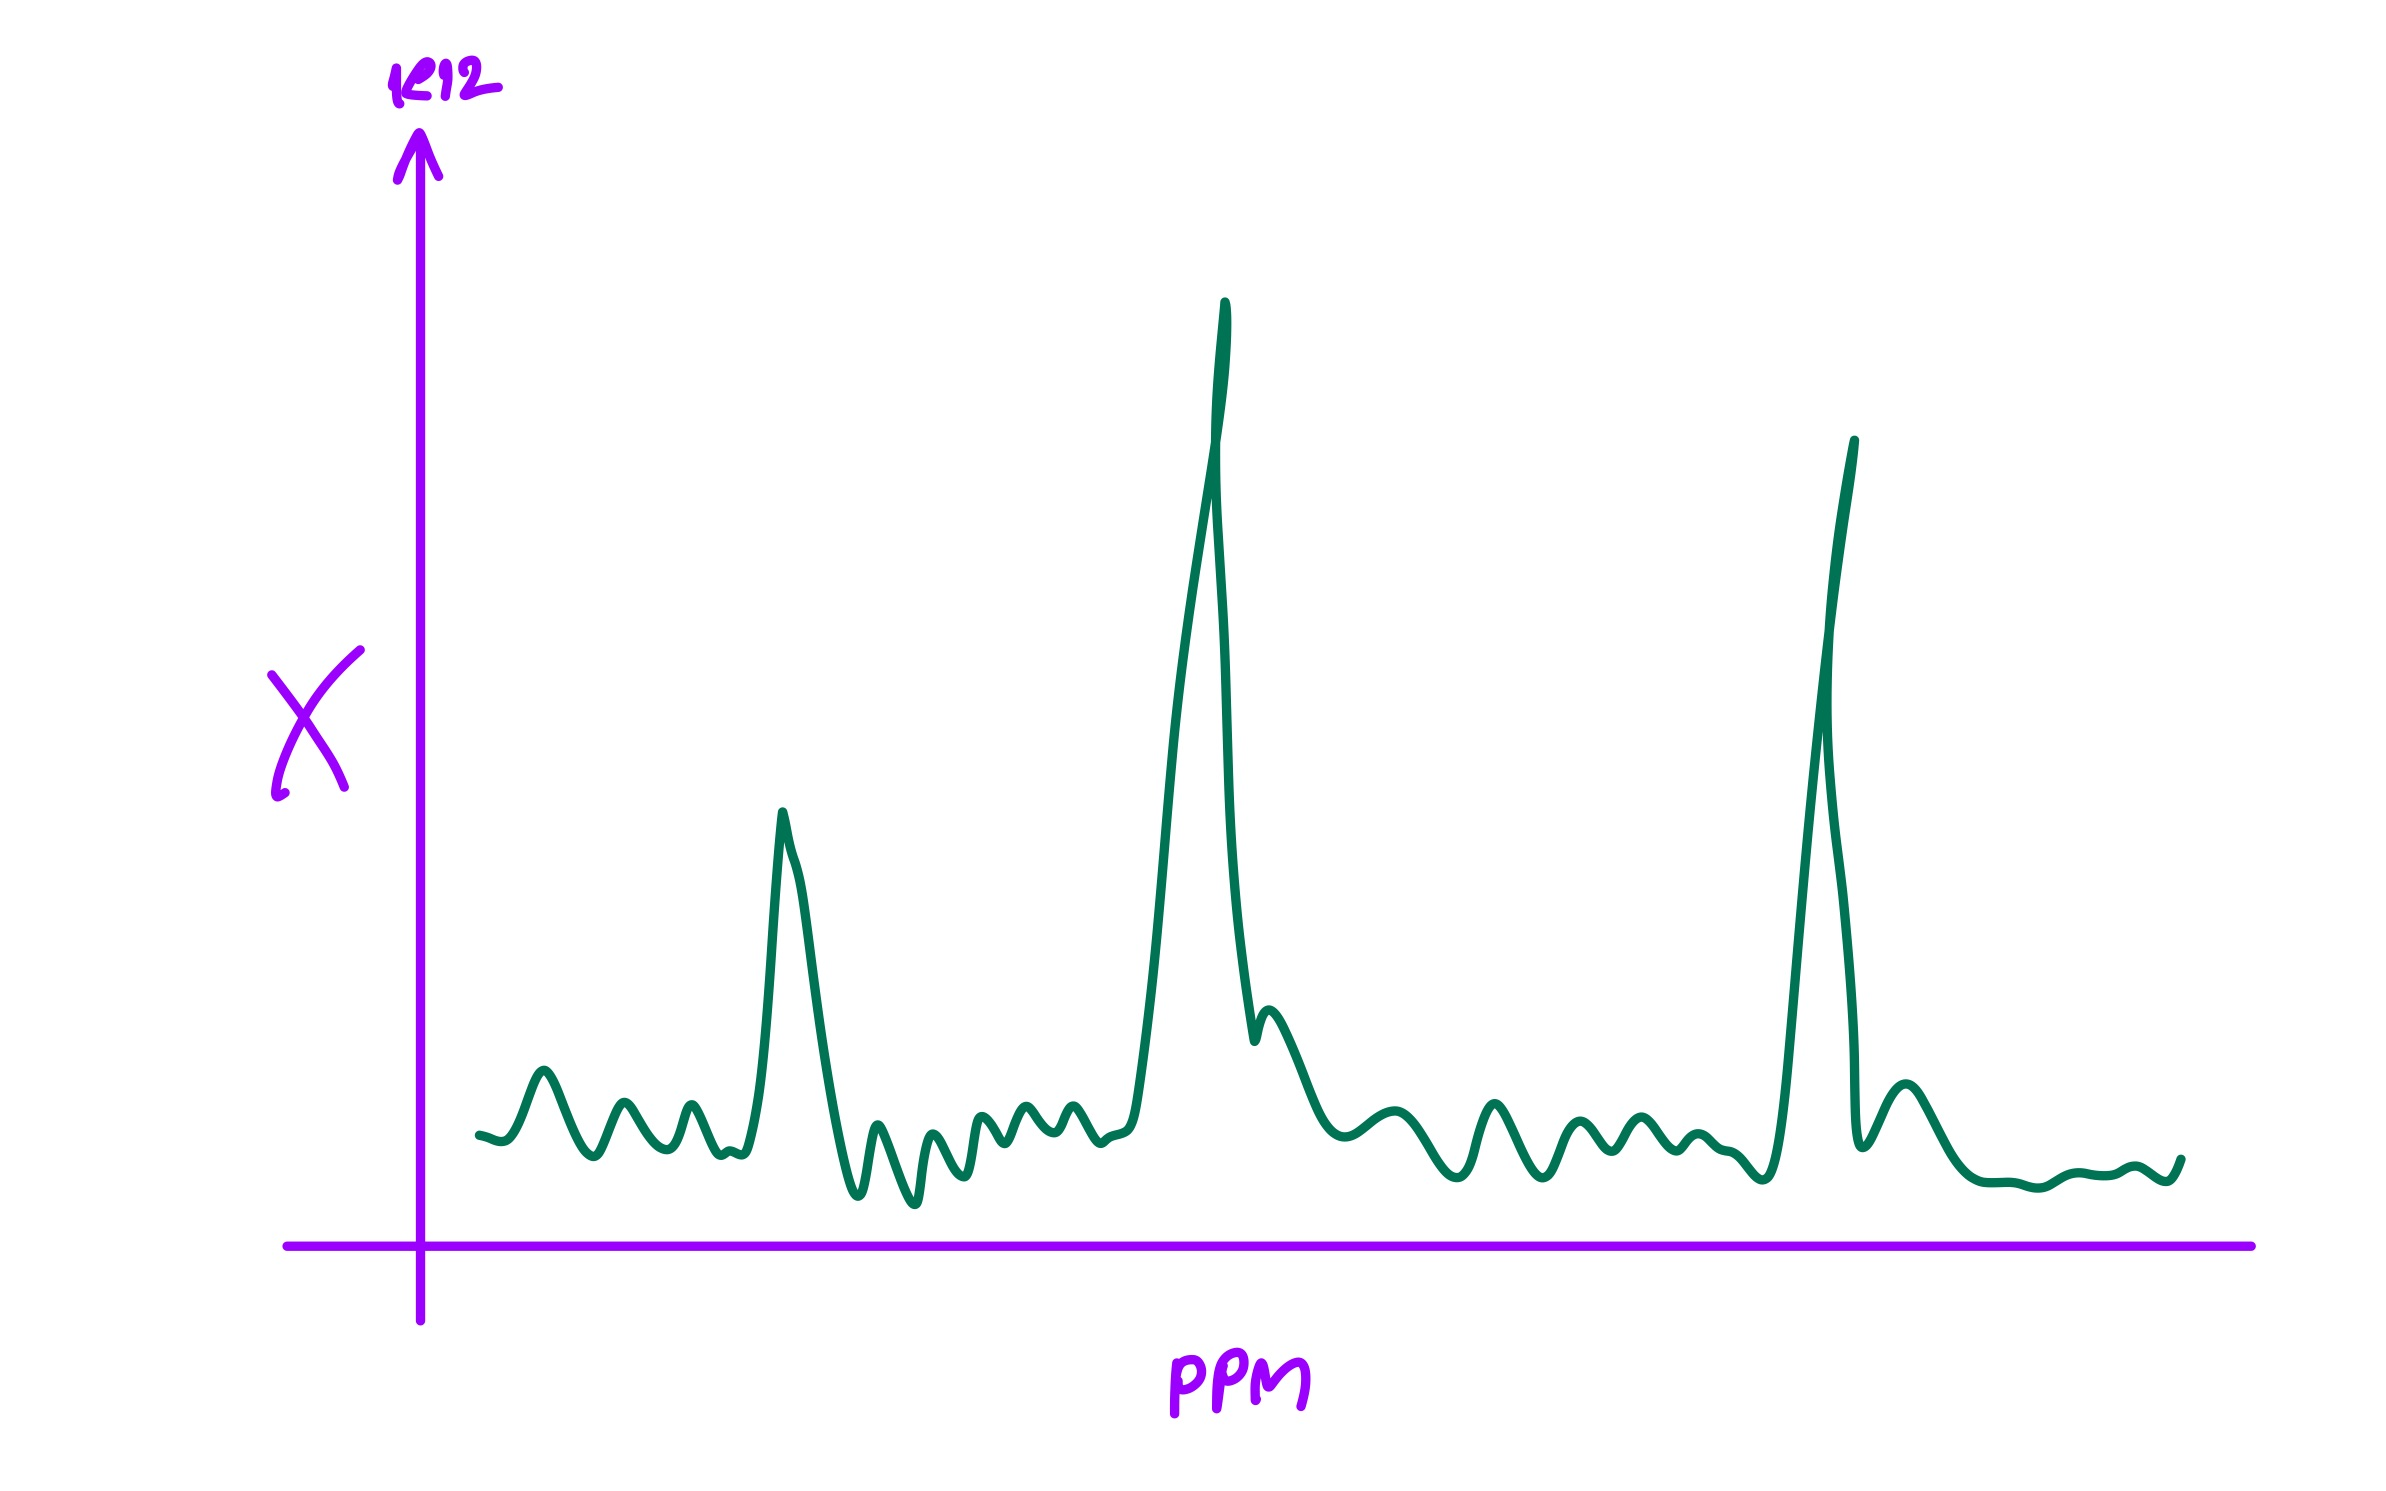

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
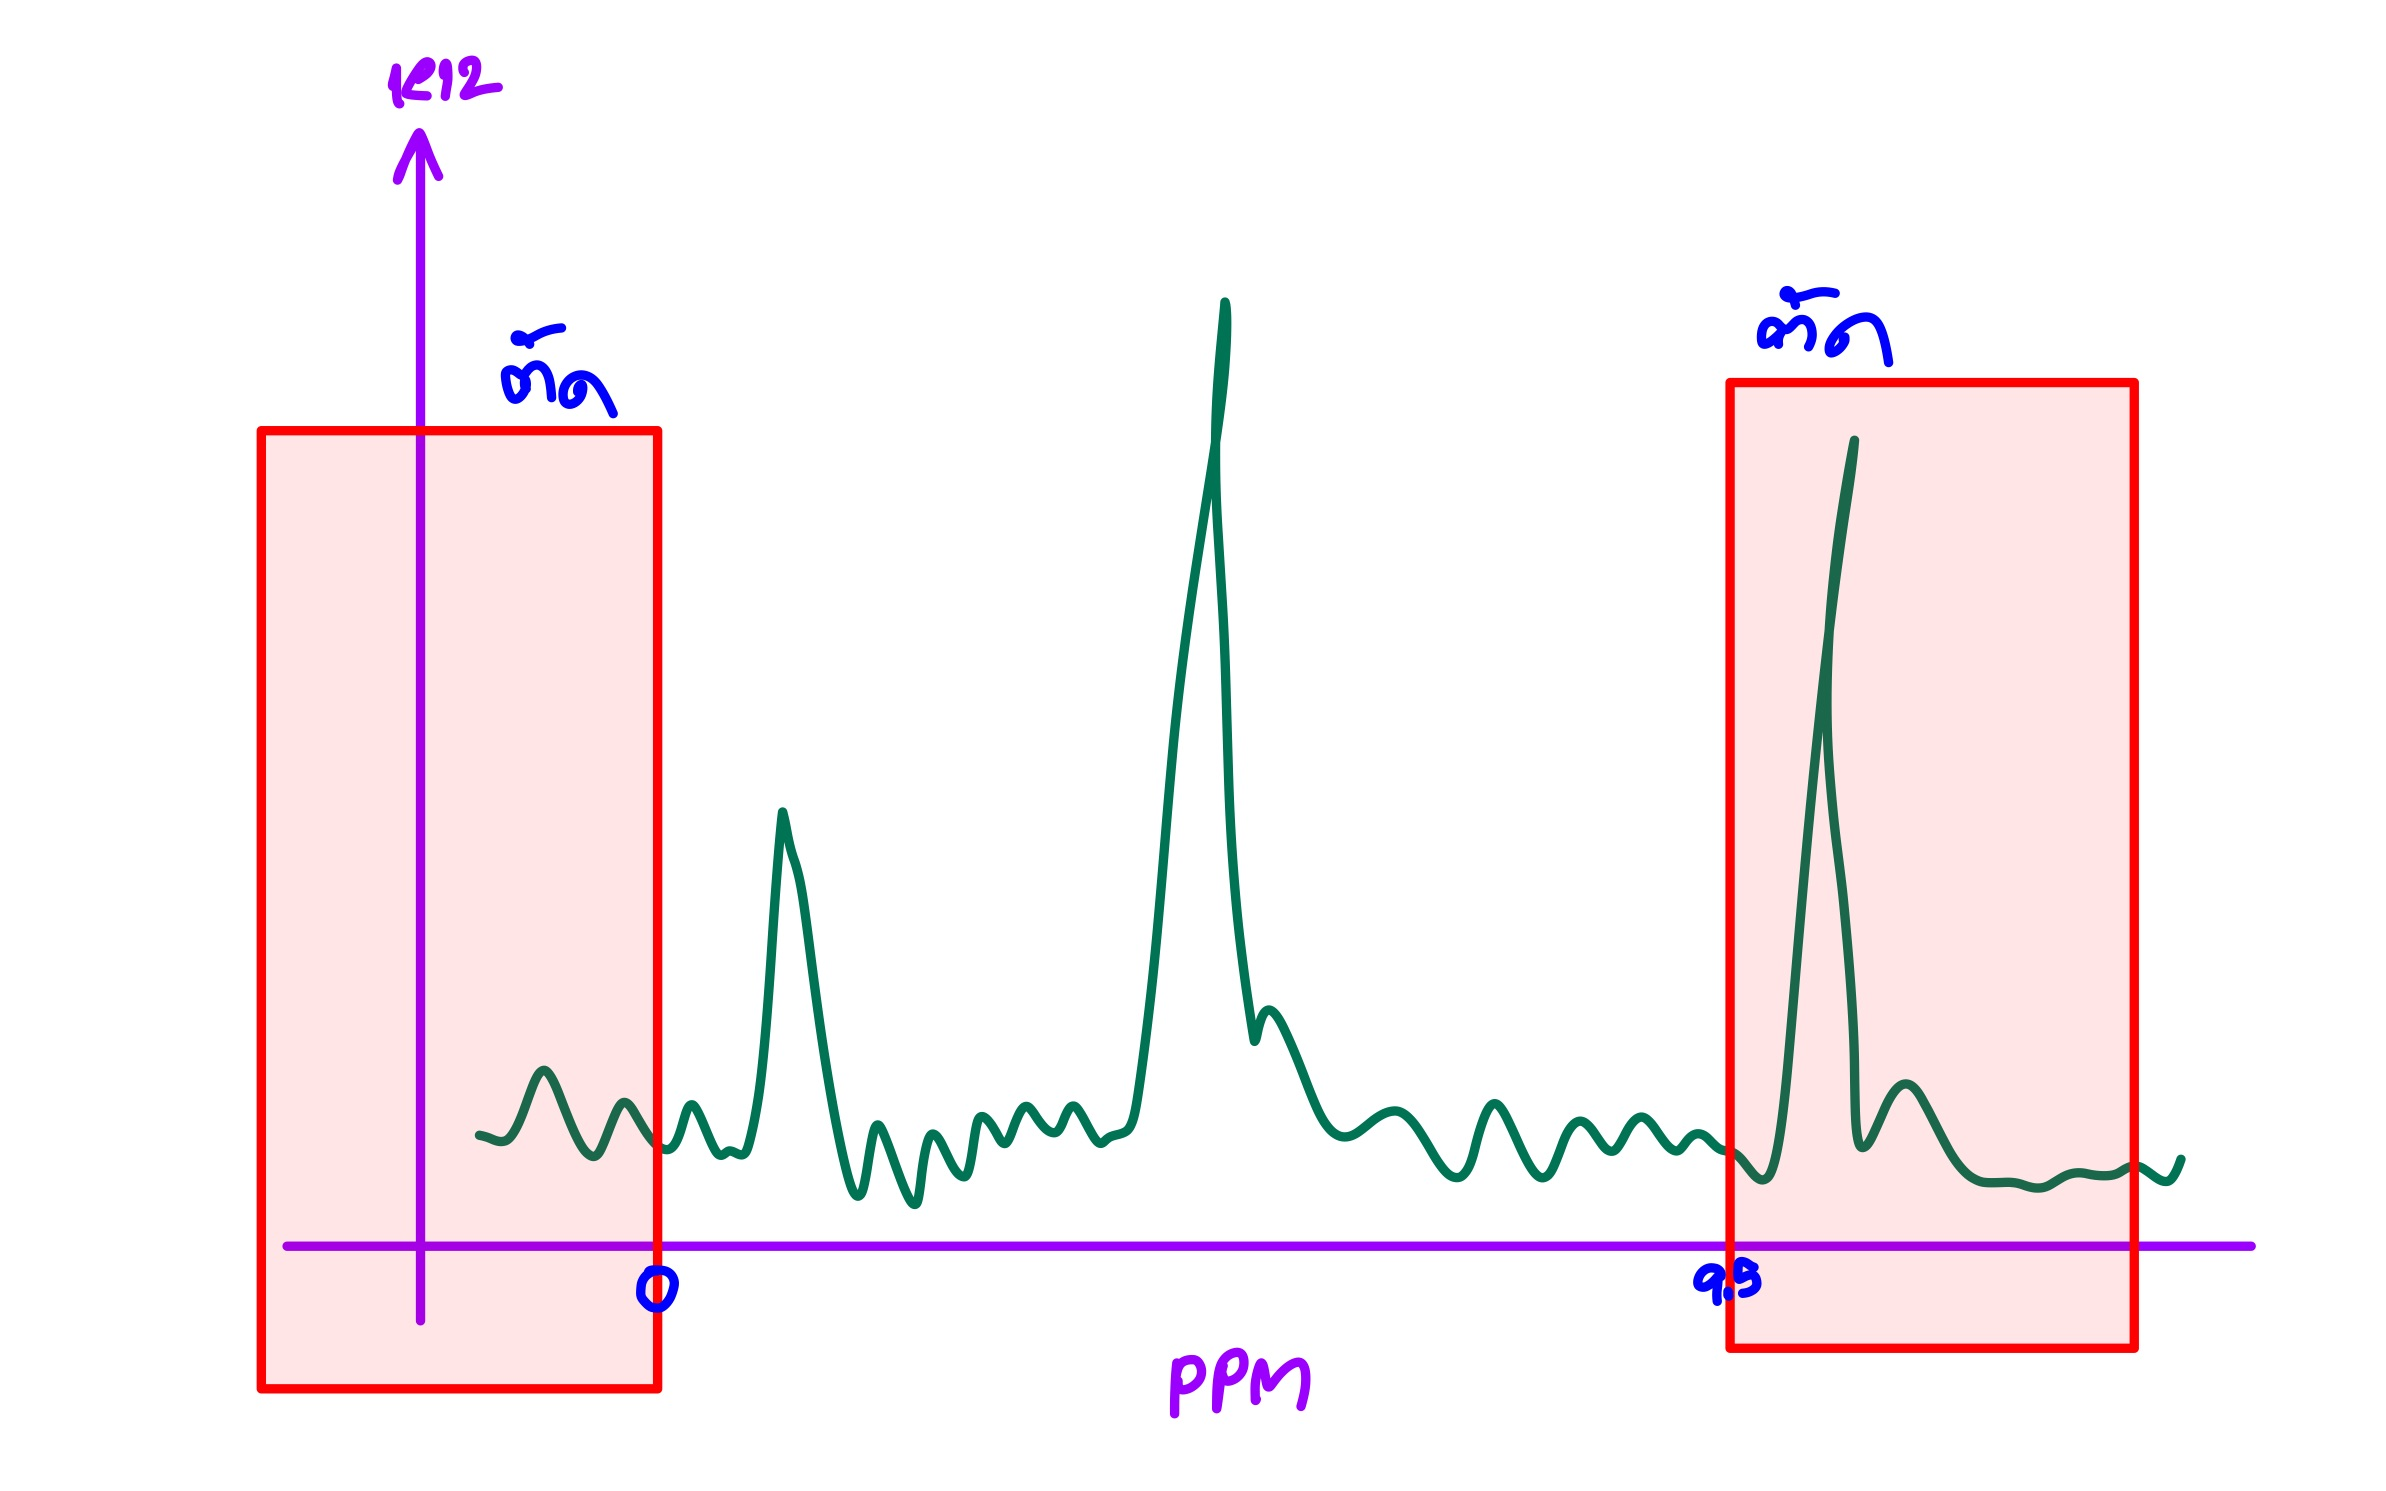

และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
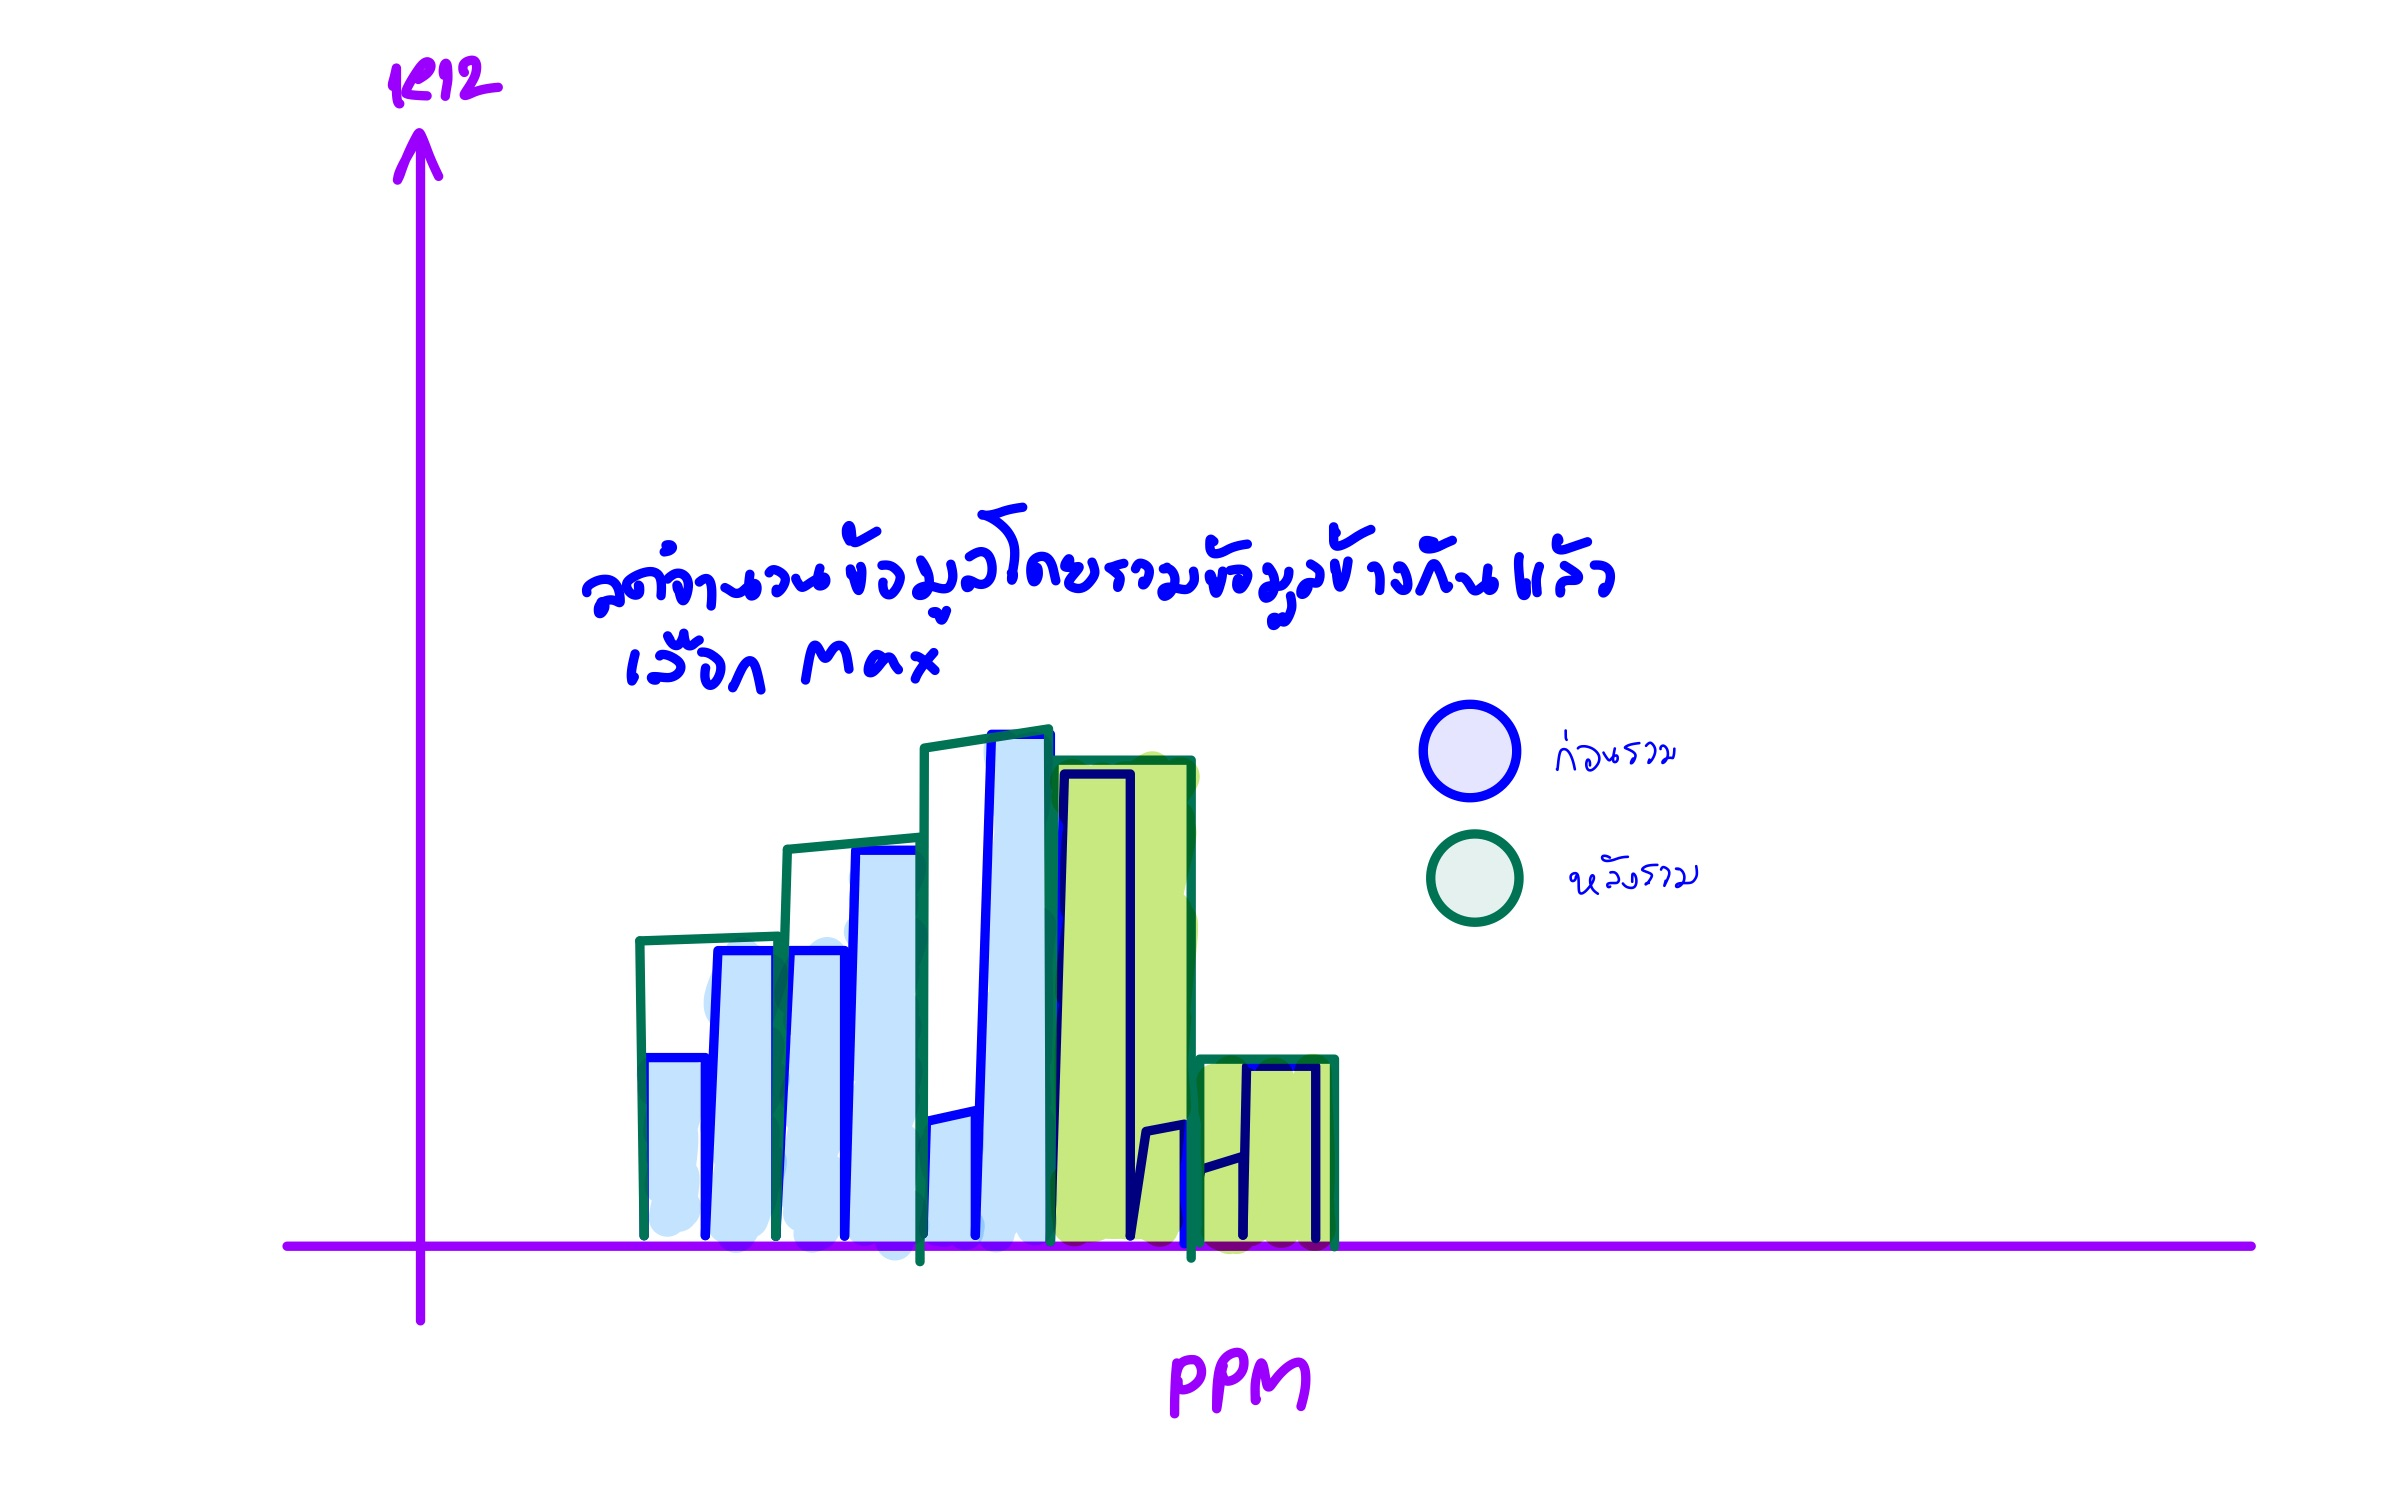

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

# import data

In [1]:
import pandas as pd
import os
import pickle
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_xnn = '/content/drive/MyDrive/data_viz_2024_DATA/finalexam/Xnn_ppm.pickle'

In [4]:
# เปิดไฟล์และโหลดข้อมูล
with open(path_to_xnn, 'rb') as file:
    df = pickle.load(file)


In [5]:
# ตรวจสอบประเภทและโครงสร้างข้อมูลในตัวแปร df
print(type(df))
print(len(df))  # ถ้าเป็น tuple จะแสดงจำนวนองค์ประกอบใน tuple
print(df)       # ดูข้อมูลทั้งหมดใน tuple เพื่อวิเคราะห์

<class 'tuple'>
2
(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
         1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
       [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
         1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
       [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
        -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
       ...,
       [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
        -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
       [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
        -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
       [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
         1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]), array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
       -1.26045493, -1.26064005]))


# preprocess ข้อมูลตามคำแนะนำข้างบน

* ค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift

* จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm  ≤  0 และ ppm  ≥  9.5)

In [6]:
# แยกข้อมูลจาก tuple
intensity_array, ppm_array = df

# สร้าง mask สำหรับค่า ppm ที่อยู่ในช่วงที่ต้องการ (0 < ppm < 9.5)
mask = (ppm_array > 0) & (ppm_array < 9.5)

# กรองค่า intensity และ ppm ด้วย mask
filtered_intensity = intensity_array[:, mask]
filtered_ppm = ppm_array[mask]

# สร้าง DataFrame โดยใช้ filtered_intensity เป็นข้อมูลและ filtered_ppm เป็นชื่อคอลัมน์
df_filtered = pd.DataFrame(filtered_intensity, columns=filtered_ppm)

# แสดงข้อมูลที่กรองแล้ว
print(df_filtered.head())

       9.499902      9.499717      9.499532      9.499347      9.499161  \
0 -2.238253e+07 -2.260135e+07 -2.267760e+07 -2.349828e+07 -2.480870e+07   
1 -1.588220e+07 -1.570228e+07 -1.537986e+07 -1.482737e+07 -1.378149e+07   
2 -9.762433e+06 -9.635796e+06 -1.008305e+07 -1.057019e+07 -1.146064e+07   
3 -1.152097e+07 -1.159339e+07 -1.195908e+07 -1.241262e+07 -1.312839e+07   
4 -1.927329e+07 -2.099650e+07 -2.269406e+07 -2.366070e+07 -2.397809e+07   

       9.498976      9.498791      9.498606      9.498421      9.498236  ...  \
0 -2.539089e+07 -2.505947e+07 -2.428853e+07 -2.354519e+07 -2.290584e+07  ...   
1 -1.258266e+07 -1.182117e+07 -1.153942e+07 -1.119722e+07 -1.040386e+07  ...   
2 -1.288136e+07 -1.434071e+07 -1.492120e+07 -1.432174e+07 -1.282832e+07  ...   
3 -1.415492e+07 -1.493899e+07 -1.496369e+07 -1.436891e+07 -1.365331e+07  ...   
4 -2.393181e+07 -2.410830e+07 -2.498411e+07 -2.645059e+07 -2.791940e+07  ...   

       0.001702      0.001517      0.001331      0.001146      0.000

In [7]:
df_filtered.shape

(51, 51318)

* และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

In [8]:
# จำนวนกลุ่มที่ต้องการ
num_bins = 400
# ขนาดของแต่ละกลุ่ม
group_size = filtered_intensity.shape[1] // num_bins

# ตรวจสอบว่าข้อมูลเพียงพอสำหรับการลดขนาด
if group_size == 0:
    raise ValueError("ขนาดกลุ่มไม่ถูกต้อง กรุณาตรวจสอบจำนวนข้อมูลที่กรองแล้ว")

# ใช้ np.max เพื่อเลือกค่ามากที่สุดในแต่ละกลุ่ม
quantized_intensity = np.zeros((filtered_intensity.shape[0], num_bins))

for i in range(num_bins):
    start_index = i * group_size
    end_index = start_index + group_size

    # ตรวจสอบว่า end_index ไม่เกินขนาดข้อมูล
    if end_index > filtered_intensity.shape[1]:
        end_index = filtered_intensity.shape[1]

    # หาค่า max ของแต่ละกลุ่ม
    quantized_intensity[:, i] = np.max(filtered_intensity[:, start_index:end_index], axis=1)

# สร้าง DataFrame ใหม่สำหรับข้อมูลที่ลดขนาดแล้ว
df_quantized = pd.DataFrame(quantized_intensity)

# แสดงข้อมูลที่ลดขนาดแล้ว
print(df_quantized.head())

            0             1             2             3             4    \
0 -1.096616e+07 -1.478194e+07 -1.325201e+07 -1.491779e+07 -1.416631e+07   
1 -9.802330e+06 -1.125639e+07 -1.111794e+07 -1.378155e+07 -1.119268e+07   
2 -7.891979e+06 -7.546520e+06 -6.891974e+06 -8.244647e+06 -7.304242e+06   
3 -7.319846e+06 -8.236147e+06 -7.566969e+06 -7.430431e+06 -6.280961e+06   
4 -1.899300e+07 -1.601734e+07 -1.808152e+07 -1.914802e+07 -1.850795e+07   

            5             6             7             8             9    ...  \
0 -1.468660e+07 -1.168824e+07 -1.344486e+07 -1.588730e+07 -1.422980e+07  ...   
1 -1.195591e+07 -1.368989e+07 -1.261270e+07 -1.283740e+07 -1.258725e+07  ...   
2 -6.546725e+06 -7.270440e+06 -7.980979e+06 -8.026645e+06 -6.237903e+06  ...   
3 -7.403515e+06 -6.695991e+06 -6.904685e+06 -7.934561e+06 -8.910973e+06  ...   
4 -1.872885e+07 -1.857303e+07 -1.782770e+07 -1.906649e+07 -1.984704e+07  ...   

            390           391           392           393           

In [9]:
df_quantized.shape

(51, 400)

# กรณี PCA 2 มิติ

##ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้ + visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

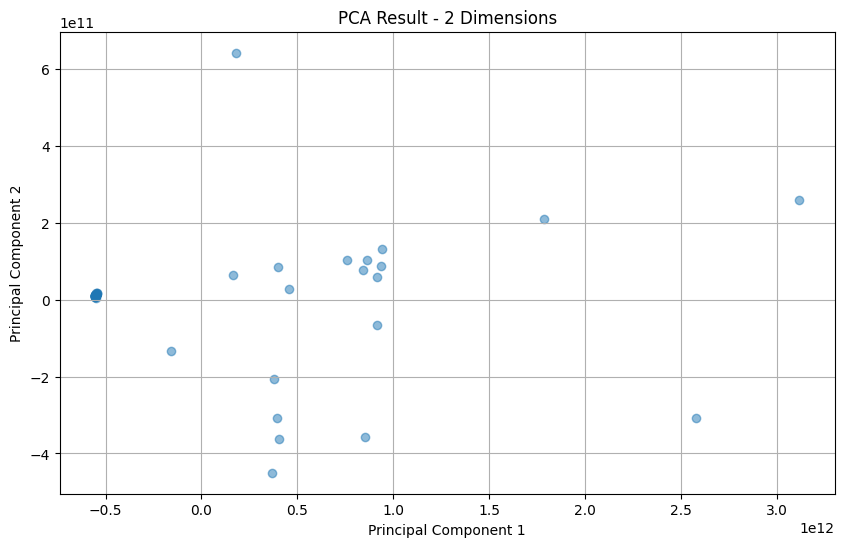

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px

# ทำ PCA สำหรับ 2 มิติ
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(df_quantized)

# สร้าง DataFrame สำหรับ 2 มิติ
df_2d = pd.DataFrame(data=principal_components_2d, columns=['PC1', 'PC2'])

# แสดงผล 2 มิติด้วย Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_2d['PC1'], df_2d['PC2'], alpha=0.5)
plt.title('PCA Result - 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


## ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี


เลือกใช้ KMeans ในการจัดกลุ่ม

สร้างกราฟ Elbow Method เพื่อหา n_clusters ที่เหมาะสม

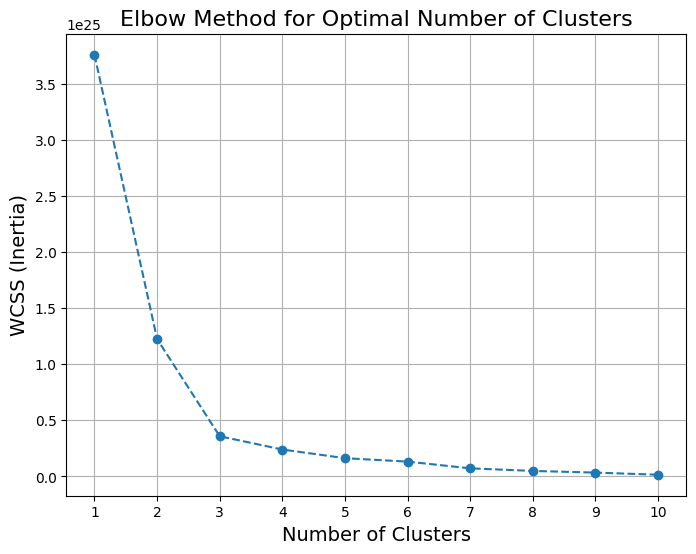

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# คำนวณค่า Inertia สำหรับจำนวนกลุ่มที่ต่างกัน
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_2d)
    wcss.append(kmeans.inertia_)

# สร้างกราฟ Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Inertia)', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

จะเห็นว่าจุดหักศอกอยู่ที่ 3 ดังนั้นจึงเลือกที่จะกำหนดให้ n_clusters ของ KMeans เป็น 3  --> แบ่งได้ 3 กลุ่ม

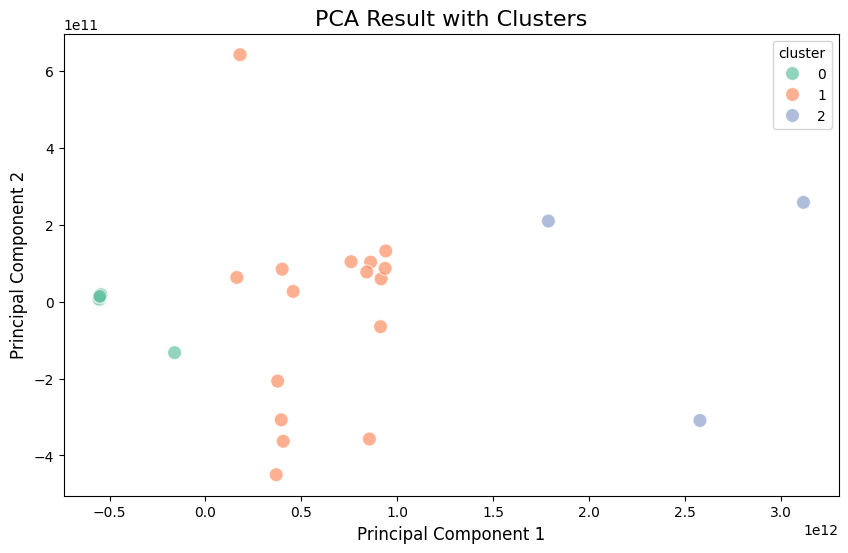

In [18]:
from sklearn.cluster import KMeans
import seaborn as sns
# ใช้ KMeans เพื่อแบ่งข้อมูลเป็น 3 กลุ่ม (หรือกำหนดตามที่ต้องการ)
kmeans = KMeans(n_clusters=3)
df_2d['cluster'] = kmeans.fit_predict(df_2d)

# สร้าง scatter plot โดยแยกสีตามกลุ่ม
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_2d['PC1'], y=df_2d['PC2'], hue=df_2d['cluster'], palette="Set2", s=100,  alpha=0.7)

# ตั้งค่าชื่อกราฟและแกน
plt.title("PCA Result with Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# แสดงผลลัพธ์
plt.show()

ตั้งชื่อ legend

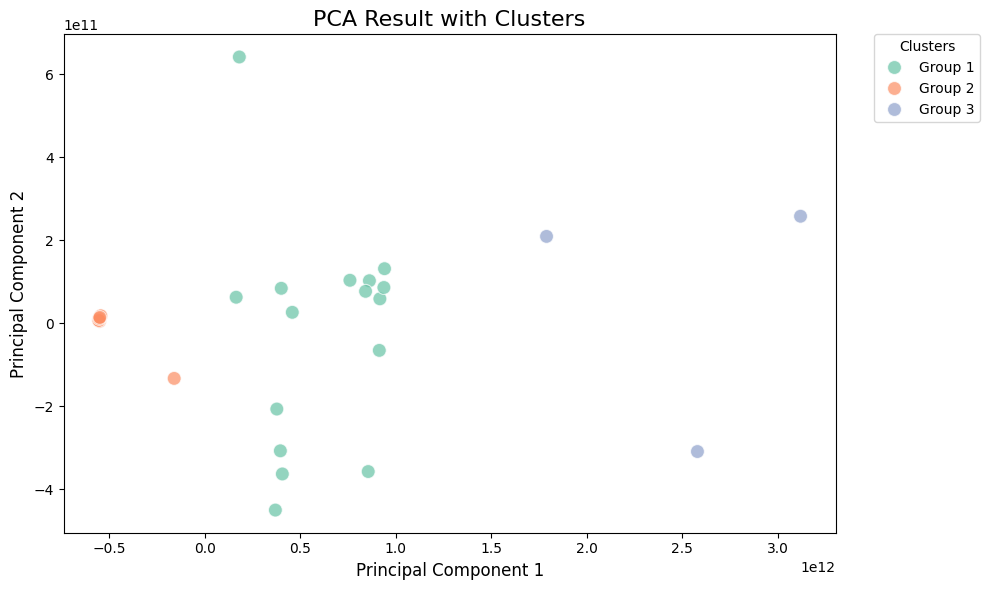

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# กำหนดสีและลำดับของกลุ่ม
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
group_order = ['Group 1', 'Group 2', 'Group 3']

# สร้าง mapping ระหว่าง cluster และ group
cluster_to_group = {0: 'Group 1', 1: 'Group 2', 2: 'Group 3'}
df_2d['group'] = df_2d['cluster'].map(cluster_to_group)

sns.scatterplot(x=df_2d['PC1'], y=df_2d['PC2'],
                hue=df_2d['group'],
                palette=dict(zip(group_order, colors)),
                hue_order=group_order,
                s=100,
                alpha=0.7)

# ตั้งค่าชื่อกราฟและแกน
plt.title("PCA Result with Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# ปรับขนาดและตำแหน่งของ legend
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# ปรับ layout เพื่อให้ legend ไม่ทับกับกราฟ
plt.tight_layout()

# แสดงผลลัพธ์
plt.show()


**แกนของกราฟ**

แกน x แทน PC 1 (องค์ประกอบหลักที่ 1)
แกน y แทน PC 2 (องค์ประกอบหลักที่ 2)
ทั้งสองแกนมีหน่วยเป็น 10^11 และ 10^12 ตามลำดับ


**การแบ่งกลุ่ม**
ข้อมูลถูกแบ่งออกเป็น 3 กลุ่ม (clusters)


**ลักษณะการกระจายตัวของข้อมูล**

* กลุ่ม 1 (สีเขียว): มีการกระจายที่กระจุกอยู่ทางซ้ายสุดของกราฟ มีค่า PC1 ต่ำที่สุด
* กลุ่ม 2 (สีส้ม): มีการกระจายมากอยู่ตรงกลางของกราฟและ มีการกระจายตัวค่อนข้างมากในแนวแกน PC2
* กลุ่ม 3 (สีฟ้า): มี 3 จุด อยู่ทางขวาสุดของกราฟ มีค่า PC1 สูงที่สุด





จากกราฟจะเห็นว่า
PC1 เป็นตัวแปรสำคัญในการแยกกลุ่ม 1 กลุ่ม 2 และ กลุ่ม 3 ออกจากกัน
PC2 แสดงความแตกต่างภายในกลุ่ม โดยเฉพาะในกลุ่ม 2 ที่มีการกระจายตัวมากในแนวแกนนี้


**ข้อสังเกตเพิ่มเติม**

มีจุดข้อมูล (outlier) ในกลุ่ม 2 ที่อยู่สูงมากบนแกน PC2
และในกลุ่มที่ 3 ค่ามีความห่างกัน ซึ่งอาจเป็นข้อมูลที่มีลักษณะพิเศษหรือผิดปกติ

## สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [20]:
import pandas as pd
from sklearn.cluster import KMeans

# ใช้ KMeans เพื่อแบ่งข้อมูลออกเป็น 3 กลุ่ม (หรือจำนวนที่เหมาะสม)
kmeans = KMeans(n_clusters=3, random_state=42)
df_2d['cluster'] = kmeans.fit_predict(df_2d)

# สร้างตารางใหม่ที่มีข้อมูลว่าแต่ละจุดอยู่กลุ่มไหน
df_with_clusters = df_2d[['PC1', 'PC2', 'cluster']]

# เปลี่ยนตัวเลข cluster ให้เป็น Group 1, Group 2, Group 3
df_with_clusters['cluster'] = df_with_clusters['cluster'].apply(lambda x: f'Group {x+1}')

# แสดงผลลัพธ์
print(df_with_clusters)

             PC1           PC2  cluster
0  -5.510320e+11  1.114919e+10  Group 1
1  -5.503732e+11  1.218689e+10  Group 1
2  -5.521917e+11  1.083279e+10  Group 1
3  -5.526674e+11  1.056511e+10  Group 1
4  -5.467747e+11  1.529962e+10  Group 1
5  -5.496501e+11  1.601124e+10  Group 1
6  -5.522665e+11  1.093775e+10  Group 1
7  -5.514448e+11  1.050829e+10  Group 1
8  -5.513530e+11  1.111623e+10  Group 1
9  -5.523058e+11  1.137820e+10  Group 1
10 -5.508866e+11  1.200393e+10  Group 1
11 -5.529553e+11  1.055349e+10  Group 1
12 -5.525016e+11  1.143788e+10  Group 1
13 -5.459642e+11  1.703659e+10  Group 1
14 -5.519831e+11  1.105561e+10  Group 1
15 -5.531936e+11  1.100288e+10  Group 1
16 -5.532414e+11  1.056819e+10  Group 1
17 -5.532301e+11  1.017310e+10  Group 1
18 -5.547636e+11  9.312235e+09  Group 1
19 -5.537158e+11  1.032247e+10  Group 1
20 -5.512979e+11  1.166367e+10  Group 1
21 -5.515662e+11  1.145401e+10  Group 1
22 -5.516080e+11  8.389229e+09  Group 1
23 -5.447508e+11  1.813320e+10  Group 1


In [ ]:
df_with_clusters

,PC1,PC2,cluster
0,-5.510320e+11,1.114919e+10,Group 1
1,-5.503732e+11,1.218689e+10,Group 1
2,-5.521917e+11,1.083279e+10,Group 1
3,-5.526674e+11,1.056511e+10,Group 1
4,-5.467747e+11,1.529962e+10,Group 1
5,-5.496501e+11,1.601124e+10,Group 1
6,-5.522665e+11,1.093775e+10,Group 1
7,-5.514448e+11,1.050829e+10,Group 1
8,-5.513530e+11,1.111623e+10,Group 1
9,-5.523058e+11,1.137820e+10,Group 1


# กรณี PCA 3 มิติ

##ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้ + visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

In [11]:
# ทำ PCA สำหรับ 3 มิติ
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df_quantized)

# สร้าง DataFrame สำหรับ 3 มิติ
df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])

# แสดงผล 3 มิติด้วย Plotly
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', title='PCA Result - 3 Dimensions',
                    opacity=0.7)
fig.show()

## ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

เลือกใช้ KMeans ในการจัดกลุ่ม

สร้างกราฟ Elbow Method เพื่อหา n_clusters ที่เหมาะสม

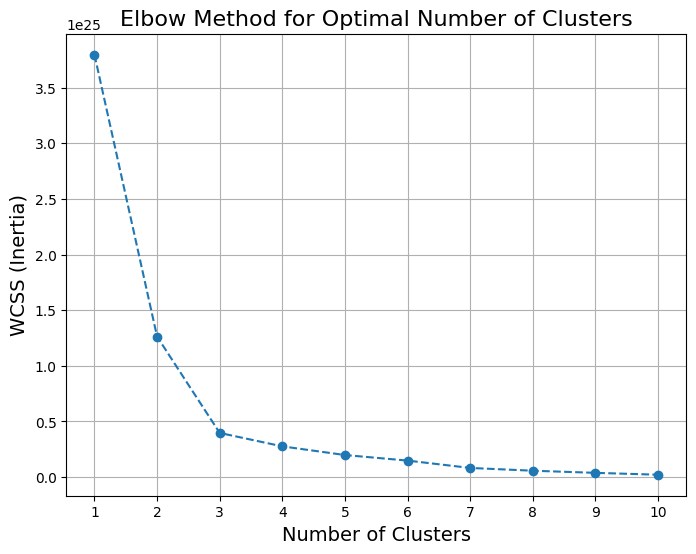

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# คำนวณค่า Inertia สำหรับจำนวนกลุ่มที่ต่างกัน
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_3d)
    wcss.append(kmeans.inertia_)

# สร้างกราฟ Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Inertia)', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

จะเห็นว่าจุดหักศอกอยู่ที่ 3 ดังนั้นจึงเลือกที่จะกำหนดให้ n_clusters ของ KMeans เป็น 3  --> แบ่งได้ 3 กลุ่ม

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# ใช้ KMeans เพื่อแบ่งข้อมูลออกเป็น 3 กลุ่ม (หรือจำนวนกลุ่มที่เหมาะสม)
kmeans = KMeans(n_clusters=3, random_state=42)
df_3d['cluster'] = kmeans.fit_predict(df_3d)

# สร้างกราฟ 3D โดยใช้ Plotly Express
fig = px.scatter_3d(
    df_3d,
    x='PC1',
    y='PC2',
    z='PC3',
    color='cluster',
    labels={'cluster': 'Group'},
    color_continuous_scale=px.colors.sequential.Viridis,  # เปลี่ยนเป็นสีที่ต้องการ
    title='PCA Result - 3 Dimensions with Clusters'
)

# ปรับแต่งกราฟเพิ่มเติม
fig.update_traces(marker=dict(size=5, opacity=0.6))  # ปรับขนาดและความโปร่งใส
fig.update_layout(scene=dict(
                    xaxis_title='PC 1',
                    yaxis_title='PC 2',
                    zaxis_title='PC 3'))

# แสดงกราฟ
fig.show()


แบ่งกลุ่มได้ 3 กลุ่มดังกราฟ

## สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_3d['cluster'] = kmeans.fit_predict(df_3d)

# สร้างตารางใหม่ที่มีข้อมูลว่าแต่ละจุดอยู่กลุ่มไหน
df_with_clusters_3d = df_3d[['PC1', 'PC2','PC3', 'cluster']]

# เปลี่ยนตัวเลข cluster ให้เป็น Group 1, Group 2, Group 3
df_with_clusters_3d['cluster'] = df_with_clusters_3d['cluster'].apply(lambda x: f'Group {x+1}')

# แสดงผลลัพธ์
print(df_with_clusters_3d)

             PC1           PC2           PC3  cluster
0  -5.510320e+11  1.114919e+10 -3.973218e+09  Group 1
1  -5.503732e+11  1.218689e+10 -3.201765e+09  Group 1
2  -5.521917e+11  1.083279e+10 -3.609325e+09  Group 1
3  -5.526674e+11  1.056511e+10 -3.855084e+09  Group 1
4  -5.467747e+11  1.529962e+10  1.533275e+09  Group 1
5  -5.496501e+11  1.601124e+10  2.629799e+09  Group 1
6  -5.522665e+11  1.093775e+10 -3.442598e+09  Group 1
7  -5.514448e+11  1.050829e+10 -4.466432e+09  Group 1
8  -5.513530e+11  1.111623e+10 -3.009272e+09  Group 1
9  -5.523058e+11  1.137820e+10 -2.852541e+09  Group 1
10 -5.508866e+11  1.200393e+10 -2.383553e+09  Group 1
11 -5.529553e+11  1.055349e+10 -3.720592e+09  Group 1
12 -5.525016e+11  1.143788e+10 -3.320976e+09  Group 1
13 -5.459642e+11  1.703659e+10  3.967999e+09  Group 1
14 -5.519831e+11  1.105561e+10 -3.339646e+09  Group 1
15 -5.531936e+11  1.100288e+10 -3.249261e+09  Group 1
16 -5.532414e+11  1.056819e+10 -3.605588e+09  Group 1
17 -5.532301e+11  1.017310e+

In [ ]:
df_with_clusters_3d

,PC1,PC2,PC3,cluster
0,-5.510320e+11,1.114919e+10,-3.973218e+09,Group 1
1,-5.503732e+11,1.218689e+10,-3.201765e+09,Group 1
2,-5.521917e+11,1.083279e+10,-3.609325e+09,Group 1
3,-5.526674e+11,1.056511e+10,-3.855084e+09,Group 1
4,-5.467747e+11,1.529962e+10,1.533275e+09,Group 1
5,-5.496501e+11,1.601124e+10,2.629799e+09,Group 1
6,-5.522665e+11,1.093775e+10,-3.442598e+09,Group 1
7,-5.514448e+11,1.050829e+10,-4.466432e+09,Group 1
8,-5.513530e+11,1.111623e+10,-3.009272e+09,Group 1
9,-5.523058e+11,1.137820e+10,-2.852541e+09,Group 1


In [ ]:
df_with_clusters

,PC1,PC2,cluster
0,-5.510320e+11,1.114919e+10,Group 1
1,-5.503732e+11,1.218689e+10,Group 1
2,-5.521917e+11,1.083279e+10,Group 1
3,-5.526674e+11,1.056511e+10,Group 1
4,-5.467747e+11,1.529962e+10,Group 1
5,-5.496501e+11,1.601124e+10,Group 1
6,-5.522665e+11,1.093775e+10,Group 1
7,-5.514448e+11,1.050829e+10,Group 1
8,-5.513530e+11,1.111623e+10,Group 1
9,-5.523058e+11,1.137820e+10,Group 1


#การแบ่งกลุ่ม

In [22]:
import pandas as pd

# 1. ดูจำนวนกลุ่มในแต่ละ DataFrame
num_groups_2d = df_with_clusters['cluster'].nunique()
num_groups_3d = df_with_clusters_3d['cluster'].nunique()

print(f"Number of groups in 2D: {num_groups_2d}")
print(f"Number of groups in 3D: {num_groups_3d}")

# 2. สร้างตารางเปรียบเทียบกลุ่ม
comparison_df = pd.merge(df_with_clusters[['PC1', 'PC2', 'cluster']],
                         df_with_clusters_3d[['PC1', 'PC2', 'PC3', 'cluster']],
                         on=['PC1', 'PC2'],
                         suffixes=('_2d', '_3d'))

# เปรียบเทียบกลุ่ม
comparison_df['same_group'] = comparison_df['cluster_2d'] == comparison_df['cluster_3d']

# แสดงผลลัพธ์การเปรียบเทียบ
print(comparison_df[['cluster_2d', 'cluster_3d', 'same_group']])


Number of groups in 2D: 3
Number of groups in 3D: 3
   cluster_2d cluster_3d  same_group
0     Group 1    Group 1        True
1     Group 1    Group 1        True
2     Group 1    Group 1        True
3     Group 1    Group 1        True
4     Group 1    Group 1        True
5     Group 1    Group 1        True
6     Group 1    Group 1        True
7     Group 1    Group 1        True
8     Group 1    Group 1        True
9     Group 1    Group 1        True
10    Group 1    Group 1        True
11    Group 1    Group 1        True
12    Group 1    Group 1        True
13    Group 1    Group 1        True
14    Group 1    Group 1        True
15    Group 1    Group 1        True
16    Group 1    Group 1        True
17    Group 1    Group 1        True
18    Group 1    Group 1        True
19    Group 1    Group 1        True
20    Group 1    Group 1        True
21    Group 1    Group 1        True
22    Group 1    Group 1        True
23    Group 1    Group 1        True
24    Group 1    Group 

แบ่งกลุ่มออกมาได้ผลเหมือนกัน